# 1. Data Preparation

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import string
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the dataset csv file downloaded from Kaggle
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spotify_songs.csv')

In [3]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,14-06-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),13-12-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),05-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,19-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),05-03-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [4]:
df.shape

(32833, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

* looking into the 'playlist_genre' variable

In [6]:
df['playlist_genre'].value_counts()

,count
playlist_genre,
edm,6043
rap,5746
pop,5507
r&b,5431
latin,5155
rock,4951


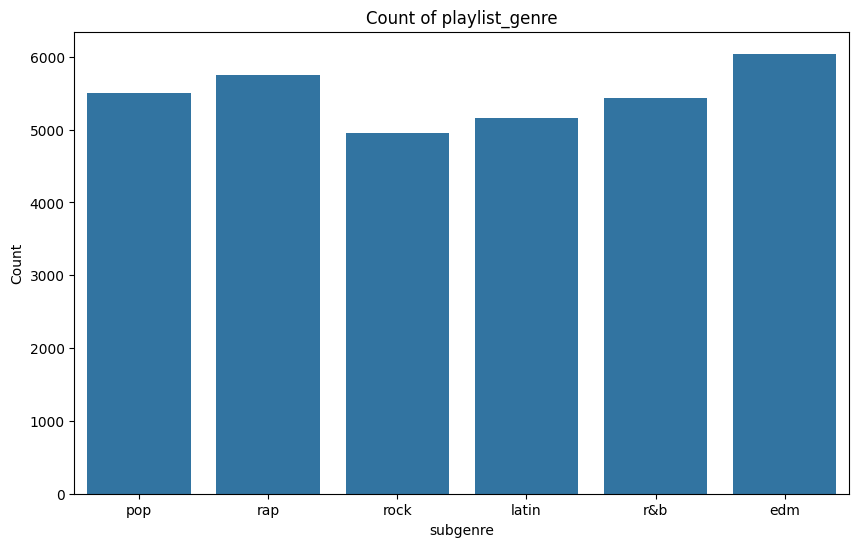

In [7]:
# Create a countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='playlist_genre', data=df)
plt.title('Count of playlist_genre')
plt.xlabel('subgenre')
plt.ylabel('Count')
plt.show()

* looking into the 'playlist_subgenre' variable

In [8]:
df['playlist_subgenre'].value_counts()

,count
playlist_subgenre,
progressive electro house,1809
southern hip hop,1675
indie poptimism,1672
latin hip hop,1656
neo soul,1637
pop edm,1517
electro house,1511
hard rock,1485
gangster rap,1458


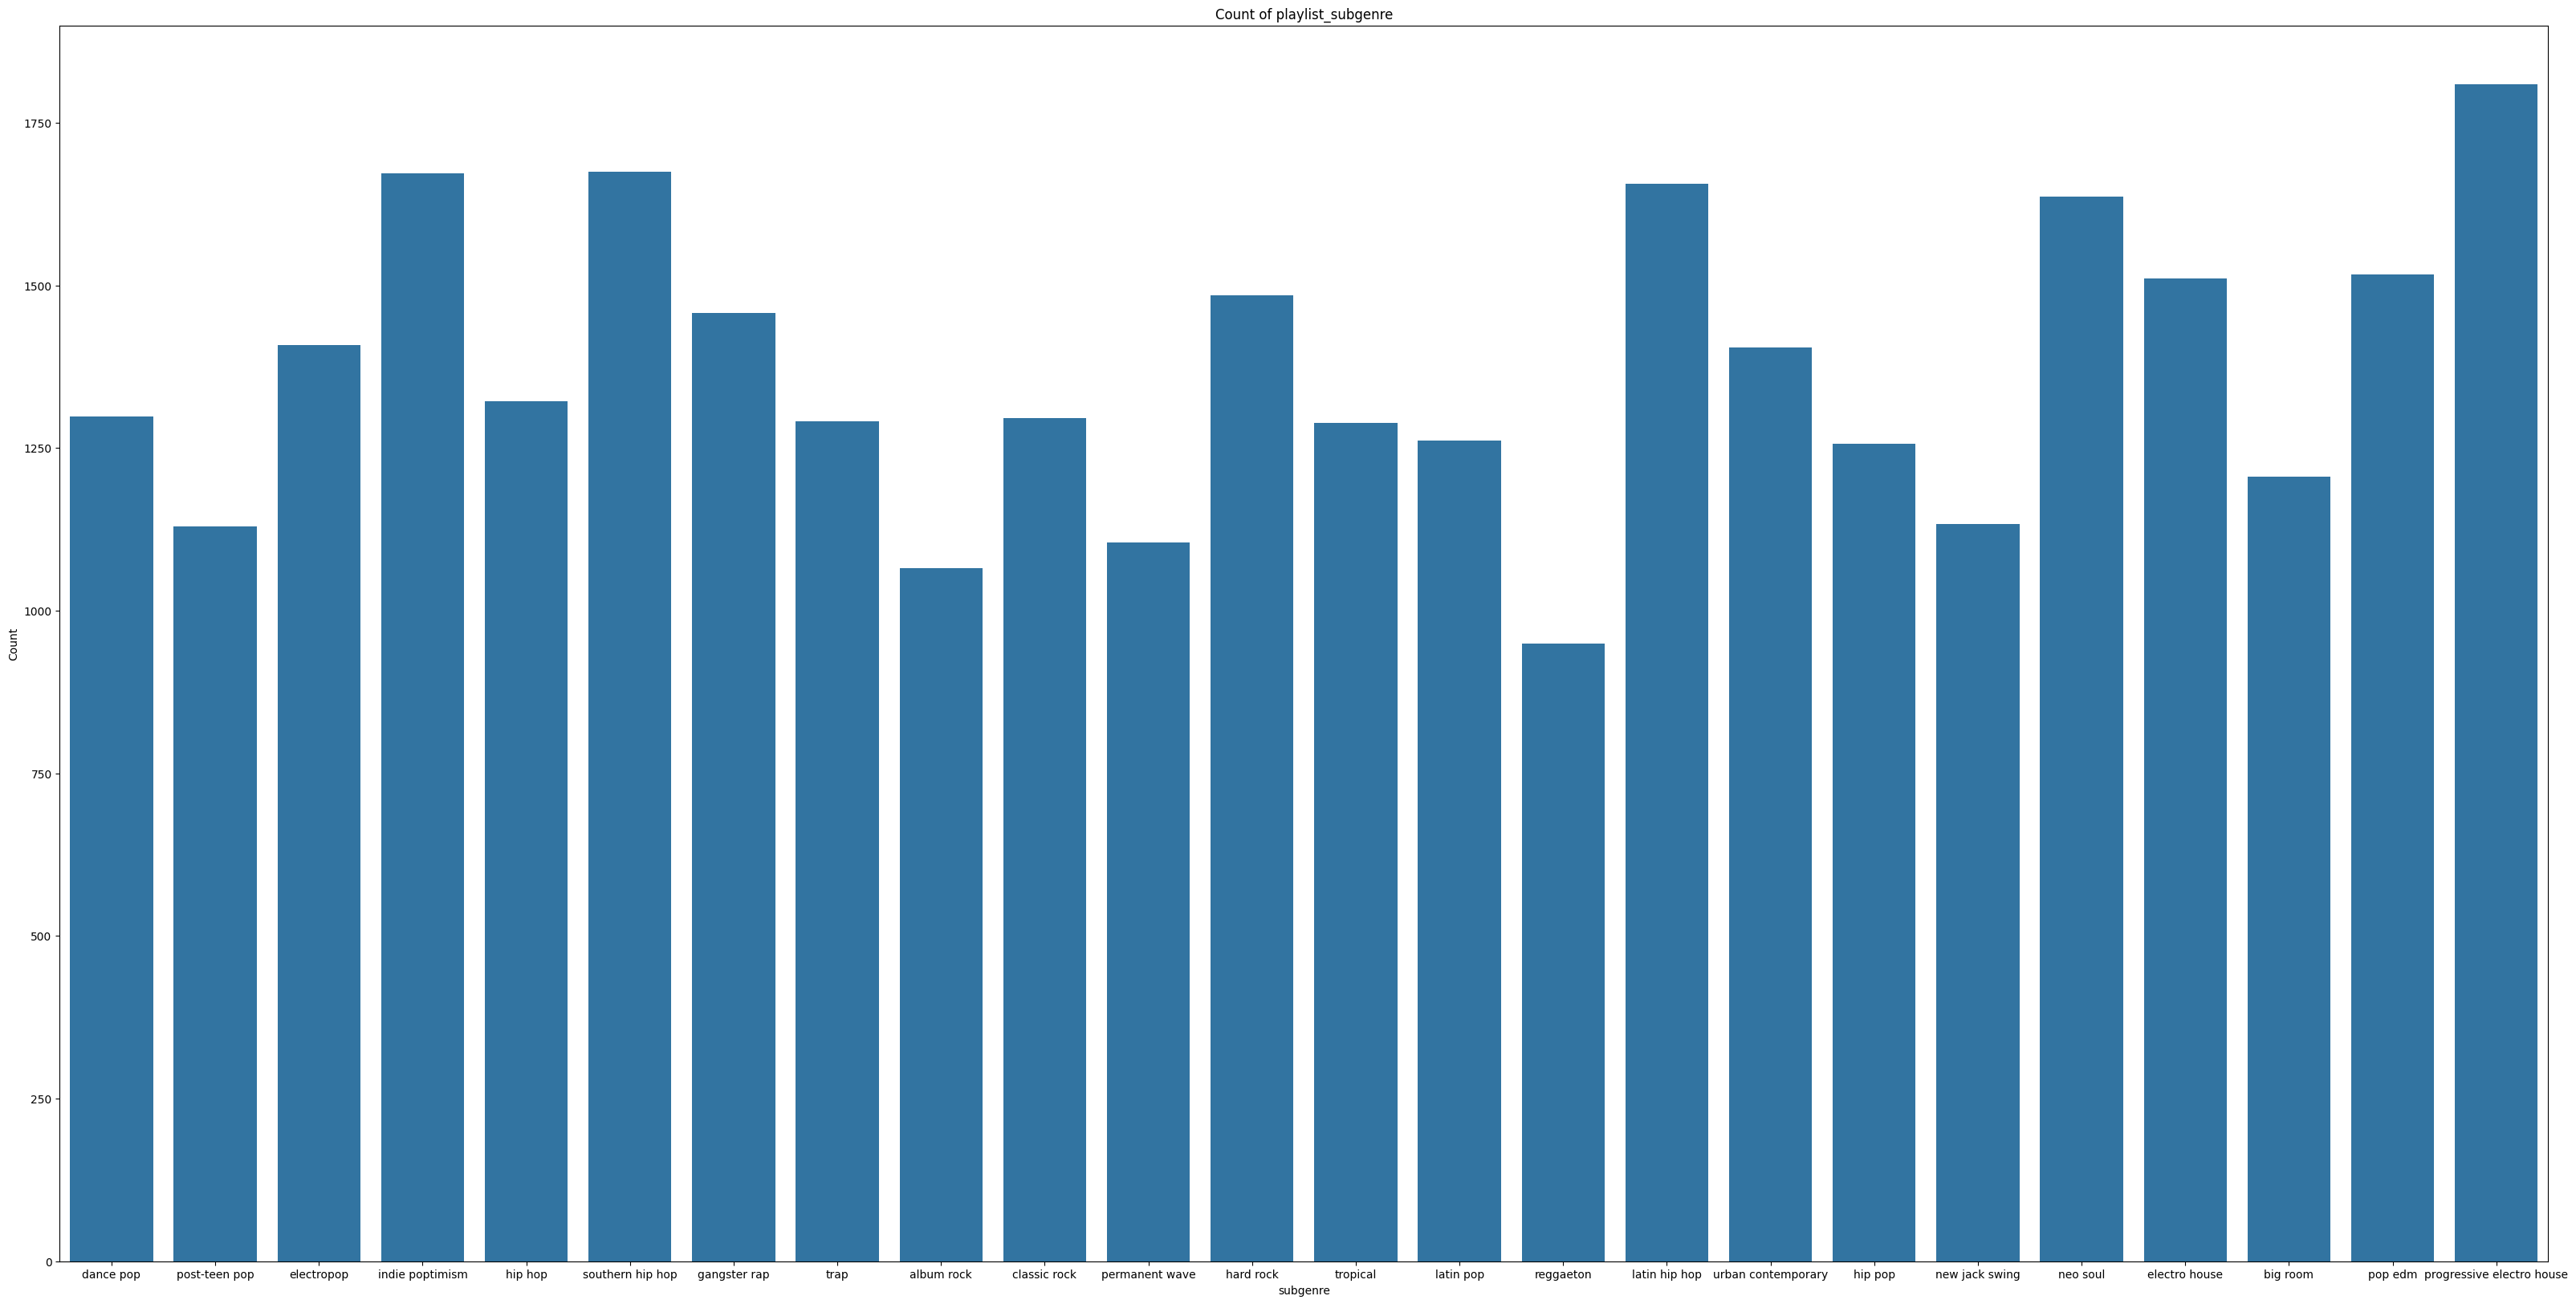

In [9]:
# Create a countplot
plt.figure(figsize=(40, 20))
sns.countplot(x='playlist_subgenre', data=df, orient='v')
plt.title('Count of playlist_subgenre')
plt.xlabel('subgenre')
plt.ylabel('Count')
plt.show()

* both 'playlist_subgenre' and 'playlist_genre' look evenly spread, therefore they are not included in the reduction of large categories.

In [10]:
# --- Clean Text Columns (using string library) ---

# Columns to convert
columns_to_convert = [
    'track_name',
    'track_artist',
    'playlist_name',
    'playlist_genre',
    'playlist_subgenre',
    'track_album_name'
]

# Convert specified columns to string type and create string_df
string_df = df[columns_to_convert].astype(str)

# Remove punctuation in one line
string_df = string_df.applymap(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Assign the cleaned columns back to the original DataFrame
df[columns_to_convert] = string_df


# --- Transform / Manipulate Data ---

# Create a categorical version for my target continous variable "track_popularity"
# Create the categorical bins
df['popularity_class'] = pd.cut(
    df['track_popularity'],
    bins=[0, 20, 40, 60, 80, float('inf')],
    labels=['<20', '20–40', '40–60', '60–80', '>80'],
    include_lowest=True
)

# store as an ordered categorical variable
df['popularity_class'] = df['popularity_class'].astype(
    pd.CategoricalDtype(categories=['<20', '20–40', '40–60', '60–80', '>80'], ordered=True)
)

# Convert release date to datetime
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')

# Extract year, month
df['release_year'] = df['track_album_release_date'].dt.year
df['release_month'] = df['track_album_release_date'].dt.month

# Replace remaining missing years/months with median
df['release_year'] = df['release_year'].fillna(df['release_year'].median())
df['release_month'] = df['release_month'].fillna(df['release_month'].median())

# Convert year and month to string
df['release_year'] = df['release_year'].astype(str)
df['release_month'] = df['release_month'].astype(str)

# --- Final sanity checks ---
print("✅ Data preparation completed.")
print(f"Final shape: {df.shape}")
print("\nSample data after preparation:")
df.head()

✅ Data preparation completed.
Final shape: (32833, 26)

Sample data after preparation:


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity_class,release_year,release_month
0,6f807x0ima9a1j3VPbc7VN,I Dont Care with Justin Bieber Loud Luxury Remix,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Dont Care with Justin Bieber Loud Luxury Remix,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,60–80,2019,6
1,0r7CVbZTWZgbTCYdfa2P31,Memories Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories Dillon Francis Remix,2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,60–80,2019,12
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time Don Diablo Remix,2019-05-07,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,60–80,2019,5
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,40–60,2019,7
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved Future Humans Remix,2019-05-03,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,60–80,2019,5


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_id                  32833 non-null  object        
 1   track_name                32833 non-null  object        
 2   track_artist              32833 non-null  object        
 3   track_popularity          32833 non-null  int64         
 4   track_album_id            32833 non-null  object        
 5   track_album_name          32833 non-null  object        
 6   track_album_release_date  32833 non-null  datetime64[ns]
 7   playlist_name             32833 non-null  object        
 8   playlist_id               32833 non-null  object        
 9   playlist_genre            32833 non-null  object        
 10  playlist_subgenre         32833 non-null  object        
 11  danceability              32833 non-null  float64       
 12  energy            

In [12]:
df['popularity_class'].value_counts()

,count
popularity_class,
40–60,9717
60–80,7602
<20,7429
20–40,6745
>80,1340


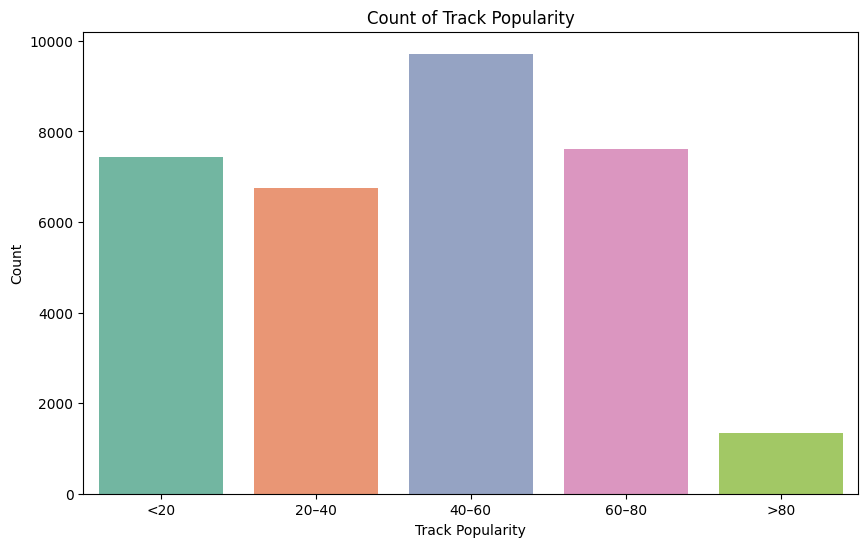

In [13]:
# Create a countplot for popularity_class
plt.figure(figsize=(10, 6))
sns.countplot(x='popularity_class', data=df, order= ['<20', '20–40', '40–60', '60–80', '>80'], palette='Set2')
plt.title('Count of Track Popularity')
plt.xlabel('Track Popularity')
plt.ylabel('Count')
plt.show()

* after the preparation of the data, the prepared csv is saved for the next steps

In [14]:
df.to_csv('Spotify_prep.csv', index=False)